<a href="https://colab.research.google.com/github/FirmanSiburian/CO2Emission/blob/main/Testing_30_January.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


In [ ]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.2.1
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.11
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
ale-py                             0.10.1
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.6.0
arviz                              0.20.0
astropy                            6.1.7
astropy-iers-data                  0.2025.1.27.0.32.44
astunparse                         1.6.3
atpublic                           4.1.0
attrs                              25.1.0
audioread         

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
# Load dataset
file_path = 'https://raw.githubusercontent.com/FirmanSiburian/CO2Emission/refs/heads/main/File2017.csv'
df = pd.read_csv(file_path, encoding='latin-1') # Specify the encoding as 'latin-1'

In [ ]:
# Dataframe columns
df.columns

Index(['Model year', 'Make', 'Model', 'Vehicle class', 'Engine size (L)',
       'Cylinders', 'Transmission', 'Fuel type', 'City (L/100 km)',
       'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mpg)',
       'CO2 emissions (g/km)', 'CO2 rating', 'Smog rating'],
      dtype='object')

In [ ]:
# Top 5 rows
df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2017,Acura,ILX,Compact,2.4,4,AM8,Z,9.4,6.8,8.2,34,192,7,6
1,2017,Acura,MDX Hybrid AWD,Sport utility vehicle: Small,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,6,6
2,2017,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS9,Z,12.6,9.0,11.0,26,259,4,6
3,2017,Acura,MDX SH-AWD Elite,Sport utility vehicle: Small,3.5,6,AS9,Z,12.2,9.0,10.7,26,251,5,6
4,2017,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,261,4,6


In [ ]:
# Print models
print(df['Model'].unique())

['ILX' 'MDX Hybrid AWD' 'MDX SH-AWD' ... 'RAV4 AWD LE'
 'Tacoma 4WD D-Cab TRD Off-Road/PRO' 'Venza AWD']


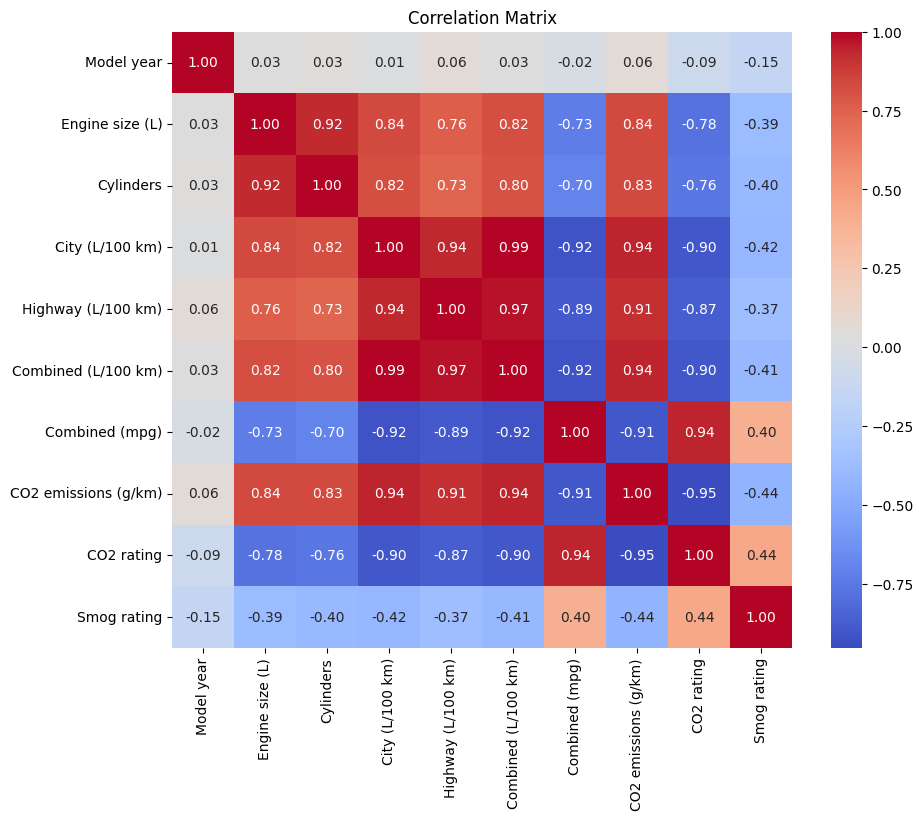

In [ ]:
# Display correlation matrix (only numeric columns)
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Define feature columns (X) and target variable (Y)
#Corrected column names based on the dataframe
features = [
    "MODEL YEAR", "MAKE", "MODEL", "VEHICLE CLASS", "ENGINE SIZE (L)", "CYLINDERS",
    "TRANSMISSION", "FUEL TYPE", "CITY (L/100km)", "HWY (L/100km)",
    "COMB (L/100km)", "COMB (mpg)", "CO2 EMISSIONS (g/km)", "SMOG RATING"
]
target = "CO2 Emissions (g/km)"

# Separate features and target variable
X = df[features]
y = df[target]

# Convert categorical features to numeric using Label Encoding
cat_features = ["MAKE", "MODEL", "VEHICLE CLASS", "TRANSMISSION", "FUEL TYPE"]  # Corrected column names
for col in cat_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (except categorical ones)
scaler = StandardScaler()
num_features = ["ENGINE SIZE (L)", "CYLINDERS", "CITY (L/100km)", "HWY (L/100km)",  # Corrected column names
                "COMB (L/100km)", "COMB (mpg)", "CO2 EMISSIONS (g/km)", "SMOG RATING"]  # Corrected column names
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

# Define models
models = {
    "CatBoost": CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, verbose=0),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1)
}

# Train & Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse
    print(f"{name}: Mean Squared Error = {mse:.4f}")

# **Univariate Polynomial Regression**
# Selecting one feature: "Engine Size (L)" for polynomial regression
X_poly = df[["ENGINE SIZE (L)"]]  # Corrected column name
y_poly = df[target]

# Split dataset
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

# Transform to polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly_train_transformed = poly.fit_transform(X_poly_train)
X_poly_test_transformed = poly.transform(X_poly_test)

# Train Polynomial Regression
poly_model = LinearRegression()
poly_model.fit(X_poly_train_transformed, y_poly_train)

# Predict & Evaluate Polynomial Regression
y_poly_pred = poly_model.predict(X_poly_test_transformed)
poly_mse = mean_squared_error(y_poly_test, y_poly_pred)
results["Polynomial Regression"] = poly_mse

print(f"Polynomial Regression: Mean Squared Error = {poly_mse:.4f}")

# Convert results to DataFrame for visualization
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['MSE'])

# Plot comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df['MSE'])
plt.title("Model Comparison (Lower MSE is Better)")
plt.ylabel("Mean Squared Error")
plt.xticks(rotation=45)
plt.show()


KeyError: "None of [Index(['MODEL YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE (L)',\n       'CYLINDERS', 'TRANSMISSION', 'FUEL TYPE', 'CITY (L/100km)',\n       'HWY (L/100km)', 'COMB (L/100km)', 'COMB (mpg)', 'CO2 EMISSIONS (g/km)',\n       'SMOG RATING'],\n      dtype='object')] are in the [columns]"